In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
np.random.seed(42)

In [5]:
categories = pd.read_csv('D:\EPAM\epam_mentorship\data\item_categories.csv')
items = pd.read_csv('D:\EPAM\epam_mentorship\data\items.csv')
shops = pd.read_csv('D:\EPAM\epam_mentorship\data\shops.csv')
sales = pd.read_csv('D:\EPAM\epam_mentorship\data\sales_train.csv')

### Checking NaN

In [6]:
shops.isna().sum(), items.isna().sum(), categories.isna().sum(), sales.isna().sum()

(shop_name    0
 shop_id      0
 dtype: int64,
 item_name           0
 item_id             0
 item_category_id    0
 dtype: int64,
 item_category_name    0
 item_category_id      0
 dtype: int64,
 date              0
 date_block_num    0
 shop_id           0
 item_id           0
 item_price        0
 item_cnt_day      0
 dtype: int64)

There are no NaN values

## Check common sense

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


The fact that item_cnt_day has the type float is kind of suspicios. It might be a sign of existing outliers

In [8]:
sales[sales.item_cnt_day != round(sales.item_cnt_day)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day


There are no float values so let's transform float -> int

In [9]:
sales.item_cnt_day = sales.item_cnt_day.astype(int)

In [10]:
sales.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day        int32
dtype: object

In [11]:
sales.describe(percentiles=[.25, .5, .75, .95]).drop(['shop_id', 'item_id'], axis = 1)

,date_block_num,item_price,item_cnt_day
count,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,8.908532e+02,1.242641e+00
std,9.422988e+00,1.729800e+03,2.618834e+00
min,0.000000e+00,-1.000000e+00,-2.200000e+01
25%,7.000000e+00,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.990000e+02,1.000000e+00
75%,2.300000e+01,9.990000e+02,1.000000e+00
95%,3.100000e+01,2.690000e+03,2.000000e+00
max,3.300000e+01,3.079800e+05,2.169000e+03


Noticing some suspicios numbers in 'min' row

In [12]:
sales[sales.item_price <= 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1


In [13]:
len(sales[sales.item_cnt_day <= 0])

7356

There are some incorrect values in 'item_price' and 'item_cnt_day'. As a solution we can erase all the outliers or make the negative count positive assuming the minus appeard just by mistake

# !!!!


In [7]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [8]:
month_count_item = pd.DataFrame(sales.groupby(['item_id','shop_id', 'date_block_num'])['item_cnt_day'].sum()).reset_index(level = [0,1,2])
month_count_item.columns = ['item_id', 'shop_id', 'date_block_num', 'item_cnt_month']
month_count_item.head(10)                                                                                                                         

,item_id,shop_id,date_block_num,item_cnt_month
0,0,54,20,1.0
1,1,55,15,2.0
2,1,55,18,1.0
3,1,55,19,1.0
4,1,55,20,1.0
5,1,55,21,1.0
6,2,54,19,1.0
7,2,54,22,1.0
8,3,54,18,1.0
9,3,54,19,1.0


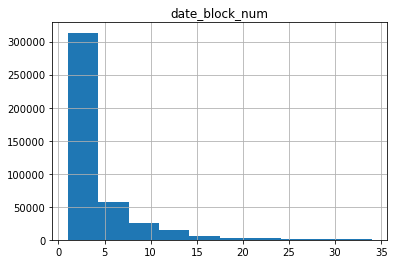

In [9]:
item_month = pd.DataFrame(month_count_item.groupby(['item_id', 'shop_id'])['date_block_num'].count())
item_month.hist()
plt.show()

In [12]:
it_index = []
sh_index = []
sh_len = len(shops)
date = []
for i in range(len(items)):
    it_index += [i]*(34 * sh_len)
    sh_index += list(range(sh_len))*34
    date += list(range(34))*sh_len

In [11]:
len(it_index), len(sh_index), len(date)

(45226800, 1330200, 753780)

In [ ]:
len(items)

In [56]:
temp = pd.DataFrame({
    'item_id' : it_index,
    'shop_id': sh_index,
    'date_block_num' : date
})

ValueError: arrays must all be same length

## Month check

In [14]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1
1,03.01.2013,0,25,2552,899.00,1
2,05.01.2013,0,25,2552,899.00,-1
3,06.01.2013,0,25,2554,1709.05,1
4,15.01.2013,0,25,2555,1099.00,1


In [15]:
month_count_item = pd.DataFrame(sales.groupby(['item_id', 'date_block_num'])['item_cnt_day'].sum()).reset_index(level = [0,1])

In [16]:
month_count_item.columns = ['item_id', 'date_block_num', 'item_cnt_month']

In [18]:
len(items)

22170

In [19]:
temp = month_count_item.copy()

In [25]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [31]:
index = []
date = []
for i in range(len(items)):
    index += [i]*34
    date += list(range(34))

In [33]:
temp = pd.DataFrame({
    'item_id' : index,
    'date_block_num' : date
})

In [41]:
len(temp) == len(full_record_month)

True

In [39]:
full_record_month = pd.merge(temp, month_count_item, how = 'outer', on = ['item_id','date_block_num'] )

In [44]:
full_record_month = full_record_month.fillna(0)

In [46]:
full_record_month.sample(10)

,item_id,date_block_num,item_cnt_month
538907,15850,7,0.0
156902,4614,26,0.0
343607,10106,3,0.0
364658,10725,8,1.0
633103,18620,23,6.0
187943,5527,25,0.0
201387,5923,5,0.0
129607,3811,33,0.0
531979,15646,15,0.0
476210,14006,6,9.0


In [17]:
month_count_item

,item_id,date_block_num,item_cnt_month
0,0,20,1
1,1,15,2
2,1,18,1
3,1,19,1
4,1,20,1
...,...,...,...
233907,22168,0,2
233908,22168,1,2
233909,22168,2,1
233910,22168,8,1


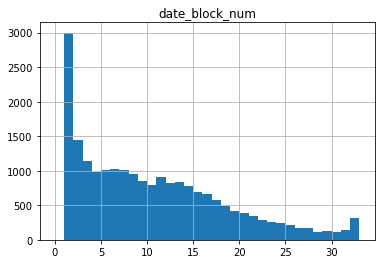

In [53]:
item_month = pd.DataFrame(month_count_item.groupby('item_id')['date_block_num'].count())
item_month.hist(bins = list(range(34)))
plt.show()

In [54]:
len(item_month)

21807

In [55]:
len(items)

22170

In [56]:
item_month.columns = ['month_count']
item_month.reset_index(level = [0])
item_month.sample(3)

,month_count
item_id,
18289,9
1409,24
9765,16


In [61]:
temp  = pd.merge(items, item_month, how = 'left', on = 'item_id')
item_month = temp.fillna(0)

In [64]:
item_month[item_month.month_count == 0]

,item_name,item_id,item_category_id,month_count
83,12/ДВЕНАДЦАТЬ (СР) (Регион),83,40,0.0
140,1С:Аудиокниги. Аладдин и другие восточные сказ...,140,45,0.0
168,1С:Аудиокниги. Аудиокурсы по географии. 6 клас...,168,44,0.0
173,1С:Аудиокниги. Аудиоэнциклопедия для самых мал...,173,45,0.0
204,"1С:Аудиокниги. Г.Р. Хаггард. Клеопатра [PC, Ци...",204,44,0.0
...,...,...,...,...
21974,"Шарф Doctor Who Tardis синий 1,6м",21974,61,0.0
21975,Шарф Doctor Who цветной 2м,21975,61,0.0
22022,ЭКИПАЖ (rem),22022,40,0.0
22035,ЭЛВИН И БУРУНДУКИ 2,22035,40,0.0


363 items were not sold at all

### Shops

In [15]:
shops.head(7)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6


In [16]:
shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   shop_name  60 non-null     object
 1   shop_id    60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


 It looks like the first word is the name of the city. Let's extract city name from shop name and see if it can help.

In [17]:
shops['city'] = [x.split(' ')[0] for x in shops.shop_name]

In [18]:
shops.sample(5)

,shop_name,shop_id,city
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск
5,"Вологда ТРЦ ""Мармелад""",5,Вологда
36,"Новосибирск ТРЦ ""Галерея Новосибирск""",36,Новосибирск
45,"Самара ТЦ ""ПаркХаус""",45,Самара
13,"Казань ТЦ ""Бехетле""",13,Казань


We see duplicates at indexes 0-58, 1-59 

In [19]:
shops.iloc[0,2] = 'Якутск'
shops.iloc[1,2] = 'Якутск'
shops.iloc[0,0] = shops.iloc[0,0][1:]
shops.iloc[1,0] = shops.iloc[1,0][1:]
shops.head()

,shop_name,shop_id,city
0,"Якутск Орджоникидзе, 56 фран",0,Якутск
1,"Якутск ТЦ ""Центральный"" фран",1,Якутск
2,"Адыгея ТЦ ""Мега""",2,Адыгея
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха
4,"Волжский ТЦ ""Волга Молл""",4,Волжский


In [20]:
cities = pd.unique(shops['city'])
cities, len(cities)

(array(['Якутск', 'Адыгея', 'Балашиха', 'Волжский', 'Вологда', 'Воронеж',
        'Выездная', 'Жуковский', 'Интернет-магазин', 'Казань', 'Калуга',
        'Коломна', 'Красноярск', 'Курск', 'Москва', 'Мытищи', 'Н.Новгород',
        'Новосибирск', 'Омск', 'РостовНаДону', 'СПб', 'Самара', 'Сергиев',
        'Сургут', 'Томск', 'Тюмень', 'Уфа', 'Химки', 'Цифровой', 'Чехов',
        'Ярославль'], dtype=object),
 31)

We see that there are "Интернет-магазин", "Цифровой", "Выездная" which are obviously not cities. Let's leave it the way it is for now. Maybe it will not be a problem

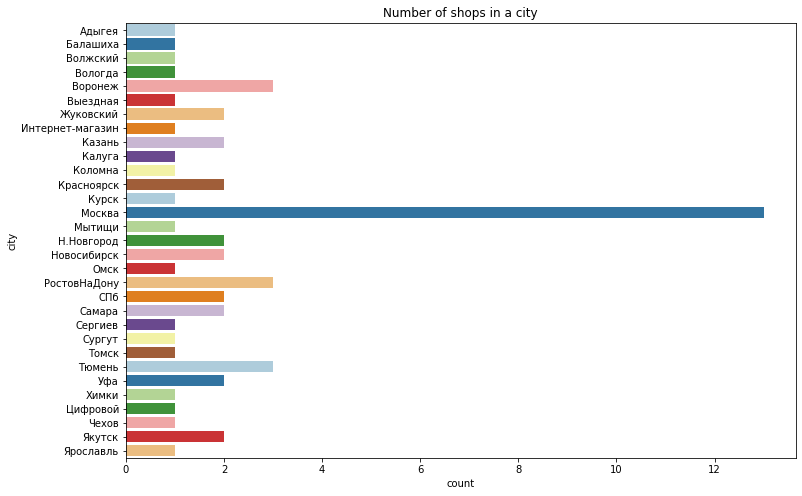

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(y="city", data=shops.iloc[2:], palette = 'Paired')
plt.title('Number of shops in a city')
plt.show()

It looks like Moscow has more shops than any other city

## Categories

In [22]:
categories.sample(8)

,item_category_name,item_category_id
69,Подарки - Сувениры,69
71,"Подарки - Сумки, Альбомы, Коврики д/мыши",71
27,Игры MAC - Цифра,27
19,Игры - PS3,19
42,"Книги - Артбуки, энциклопедии",42
21,Игры - PSP,21
29,Игры PC - Коллекционные издания,29
79,Служебные,79


In [23]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_category_name  84 non-null     object
 1   item_category_id    84 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [24]:
len(pd.unique(categories['item_category_name']))

84

All the categories are unique. But there are a lot of them. If we look at the structure we'll see that most of the categories follow the pattern '1 - 2' where 2 is additional category

Let's extract first key words (before '-') and get rid of the words in braces as they also represent additional information which may be redundant to the model

In [25]:
categories['cat'] = [x.split('-')[0].strip().split('(')[0].strip() for x in categories['item_category_name'] ]

In [26]:
pd.unique(categories['cat'])

array(['PC', 'Аксессуары', 'Билеты', 'Доставка товара', 'Игровые консоли',
       'Игры', 'Игры Android', 'Игры MAC', 'Игры PC', 'Карты оплаты',
       'Кино', 'Книги', 'Музыка', 'Подарки', 'Программы', 'Служебные',
       'Чистые носители', 'Элементы питания'], dtype=object)

Let's change all "Игры **** " to just "Игры" to simplify the categories

In [27]:
categories['cat'] = ['Игры' if x == 'Игры PC' or x == 'Игры Android' or x == 'Игры MAC' else x for x in categories['cat']  ]

In [28]:
categories.sample(5)

,item_category_name,item_category_id,cat
13,Игровые консоли - PSP,13,Игровые консоли
46,Книги - Бизнес литература,46,Книги
77,Программы - Обучающие,77,Программы
54,Книги - Цифра,54,Книги
15,Игровые консоли - XBOX 360,15,Игровые консоли


Looks nice

In [29]:
pd.unique(categories['cat'])

array(['PC', 'Аксессуары', 'Билеты', 'Доставка товара', 'Игровые консоли',
       'Игры', 'Карты оплаты', 'Кино', 'Книги', 'Музыка', 'Подарки',
       'Программы', 'Служебные', 'Чистые носители', 'Элементы питания'],
      dtype=object)

All the categories make sense. Maybe it will be neccessary to extract more information from the original categories later. But for now we'll continue exploring this data

### Let's take a look at the items

In [30]:
items.sample(10)

,item_name,item_id,item_category_id
14223,Лучшее на MP3. Николай Носков (подар. уп.) (mp...,14223,57
3498,Final Fantasy XIV: A Realm Reborn. Collector’s...,3498,29
19536,ТАЙНА ПЕРЕВАЛА ДЯТЛОВА,19536,40
18407,СБ. Первый танцевальный 5,18407,55
10714,ДАБЛ ТРАБЛ,10714,40
6253,SCORPIONS Return To Forever 2LP,6253,58
19826,ТРИ КОРОЛЯ WB (регион),19826,40
3261,"F1 2011 [PS Vita, английская версия]",3261,22
547,1С:Образовательная коллекция. English today. У...,547,77
15013,Маша и медведь. Развивающие задания для малыше...,15013,30


It looks like very few item names contain valid info about the category. So we'll leave it untouched for now

In [31]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  object
 1   item_id           22170 non-null  int64 
 2   item_category_id  22170 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 519.7+ KB


In [32]:
len(pd.unique(items.item_name))

22170

All the names are unique. There are no duplicates

#### Merge items with categories in order to proceed the analysis

In [34]:
items_with_categories = pd.merge(items,categories, on = 'item_category_id')

In [36]:
len(items) == len(items_with_categories)

True

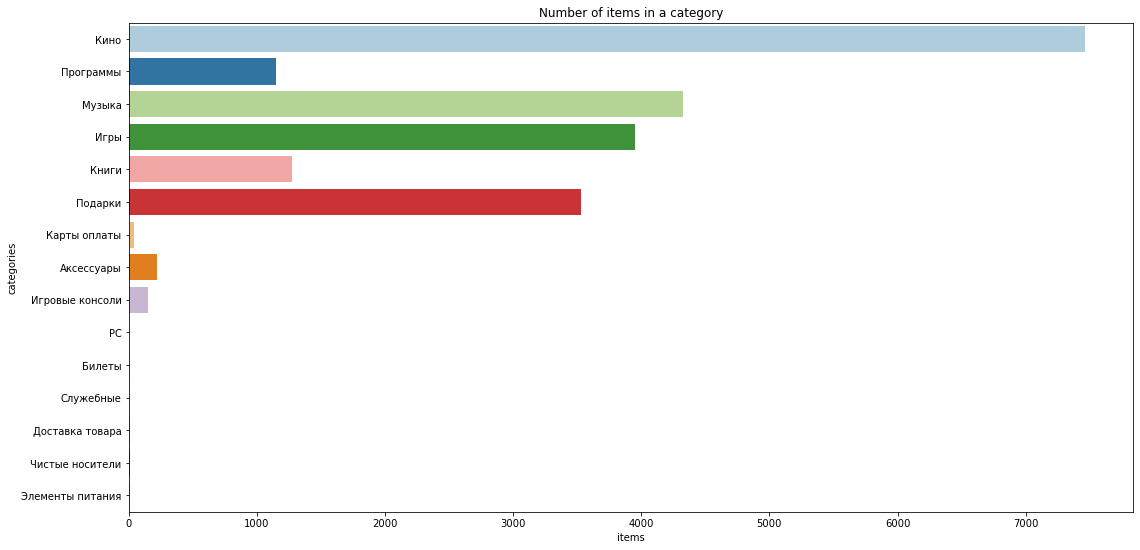

In [35]:
fig = plt.figure(figsize=(18,9))
chart = sns.countplot(y="cat", data=items_with_categories, palette = 'Paired')
chart.set(xlabel='items', ylabel='categories')
plt.title('Number of items in a category')
plt.show()

It looks like most items from items dataset are labeled as "Кино". Some categories are represented by a very limited amount of items. Maybe it would make sense to unite them into one category like 'other' for simplification later

## Sales

In [86]:
sales.sample(7)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
716594,2013-07-28,6,42,3739,299.00,1
1535492,2014-03-10,14,16,2263,999.00,1
1779464,2014-06-05,17,42,17445,399.00,1
546276,2013-06-15,5,44,14706,149.00,1
747378,2013-08-18,7,38,12550,149.00,1
2536162,2015-03-24,26,7,12473,199.00,1
2604965,2015-04-02,27,18,4348,932.67,1


In [38]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    int32  
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 123.2+ MB


Let's change values in 'date' col from string to date type

In [39]:
sales.date = pd.to_datetime(sales.date, format='%d.%m.%Y')

In [40]:
sales.sample()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
378723,2013-04-02,3,22,7130,399.0,1


In [41]:
pd.unique(sales['date_block_num'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [42]:
sales.item_price.describe(percentiles=[.25, .5, .75, .95])

count    2.935849e+06
mean     8.908532e+02
std      1.729800e+03
min     -1.000000e+00
25%      2.490000e+02
50%      3.990000e+02
75%      9.990000e+02
95%      2.690000e+03
max      3.079800e+05
Name: item_price, dtype: float64

It looks like 95% of items were sold for less than 2690 RUB considering max price is ~300.000 RUB

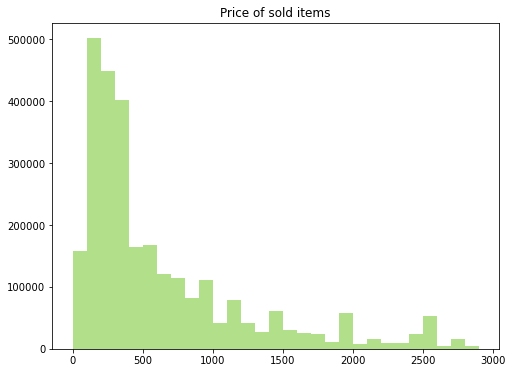

In [43]:
plt.figure(figsize=(8,6))
colors = sns.color_palette('Paired')[2]
plt.hist(sales.item_price, color = colors, bins = list(range(0,3000, 100)))
plt.title('Price of sold items')
plt.show()

In [44]:
sales.item_cnt_day.describe(percentiles=[.25, .5, .75, .875, .95])

count    2.935849e+06
mean     1.242641e+00
std      2.618834e+00
min     -2.200000e+01
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
87.5%    1.000000e+00
95%      2.000000e+00
max      2.169000e+03
Name: item_cnt_day, dtype: float64

In [45]:
len(sales[sales.item_cnt_day > 1])/len(sales)

0.10188568962504543

It looks like most items were sold by <= 1 in a day and 95% were sold in less or equal than 2

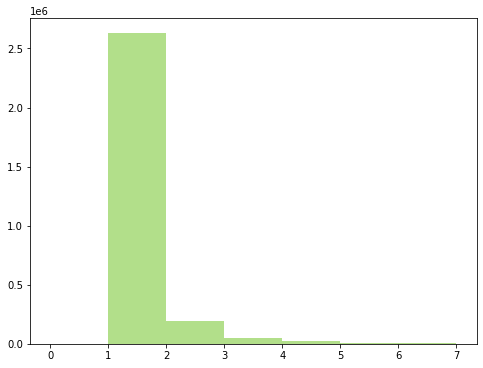

In [46]:
plt.figure(figsize=(8,6))
colors = sns.color_palette('Paired')[2]
plt.hist(sales.item_cnt_day, color = colors, bins = list(range(0,8, 1)))
plt.show()

Let's merge sales and shops dataset to see how the location affects the total amount of sold items

In [47]:
sales_shop = pd.merge(sales,shops, on = 'shop_id')

In [48]:
sales_shop.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city
517043,2013-02-07,1,28,15644,149.0,1,"Москва ТЦ ""МЕГА Теплый Стан"" II",Москва
747738,2015-04-18,27,27,13505,1199.0,2,"Москва ТЦ ""МЕГА Белая Дача II""",Москва
2220221,2014-12-19,23,43,5671,3590.0,1,"СПб ТК ""Сенная""",СПб
72566,2013-05-02,4,25,21371,1199.0,1,"Москва ТРК ""Атриум""",Москва
2244799,2014-04-28,15,52,4372,1799.0,1,"Уфа ТК ""Центральный""",Уфа


## Total sells in a city

In [49]:
cities_total = sales_shop.groupby('city')['item_cnt_day'].sum()

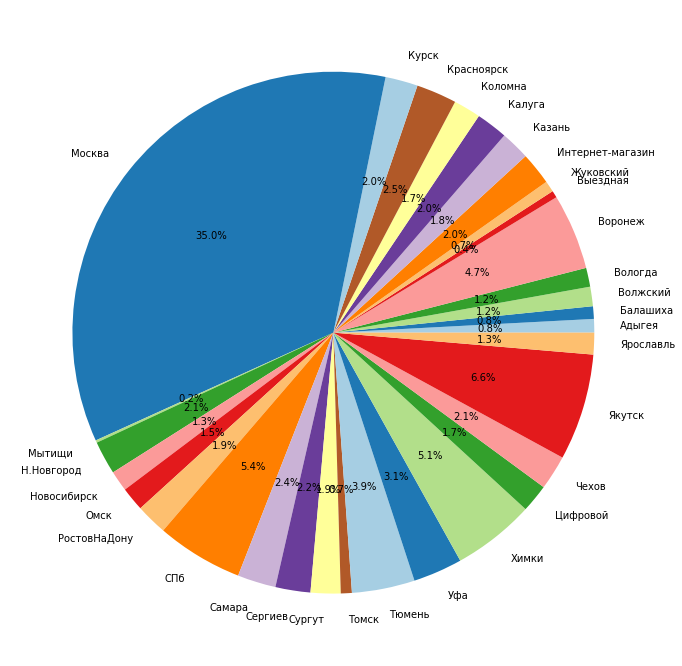

In [50]:
plt.figure(figsize=(12,12))
colors = sns.color_palette('Paired')[:len(cities_total)]
plt.pie(cities_total, labels = cities_total.index, autopct = '%0.1f%%', colors = colors)
plt.show()

As you can see from the pieplot Moscow is the leader. But Moscow also has much more shops than other cities. So let's take a look at the average count of items 

In [51]:
shops_count = pd.DataFrame(shops.groupby('city')['shop_name'].count()).reset_index(level = [0])

In [52]:
cities_total =  pd.DataFrame(cities_total).reset_index(level = [0])

In [53]:
cities_total = pd.merge(shops_count, cities_total, on = 'city')
cities_total.columns = ['city', 'shop_count', 'item_cnt_month']
cities_total['mean'] = cities_total.item_cnt_month/cities_total.shop_count
cities_total.head()

,city,shop_count,item_cnt_month,mean
0,Адыгея,1,30620,30620.000000
1,Балашиха,1,28355,28355.000000
2,Волжский,1,43942,43942.000000
3,Вологда,1,42762,42762.000000
4,Воронеж,3,171142,57047.333333


#### Average amount of sold items in a city

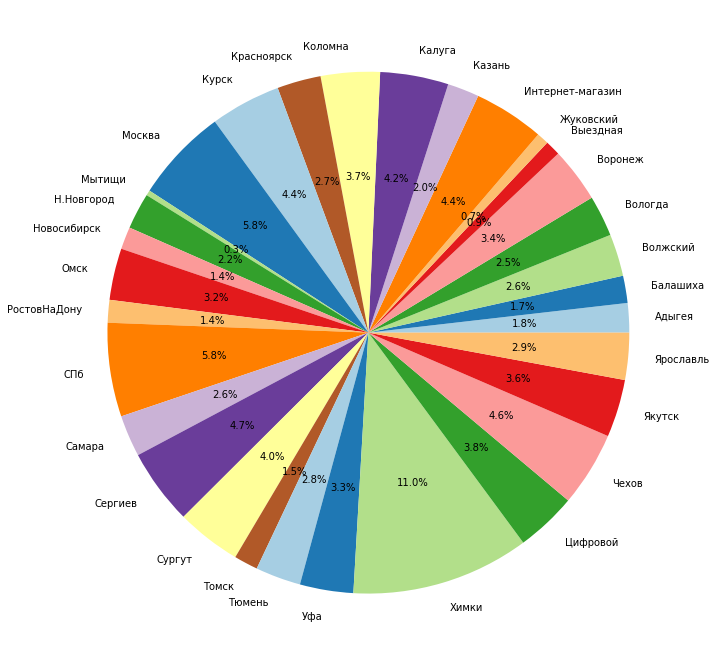

In [54]:
plt.figure(figsize=(12,12))
colors = sns.color_palette('Paired')[:len(cities_total)]
plt.pie(cities_total['mean'], labels = cities_total.city, autopct = '%0.1f%%', colors = colors)
plt.show()

From this pieplot Himky has more sold items in average. It has only one shop. 

Let's look at the amount of sold items per each shop

#### Total sells in shops

In [55]:
shops_total = sales_shop.groupby('shop_name')['item_cnt_day'].sum()

In [168]:
# plt.figure(figsize=(12,12))
# colors = sns.color_palette('Paired')[:len(shops_total)]
# plt.pie(shops_total, labels = shops_total.index, autopct = '%0.1f%%', colors = colors)
# plt.show()

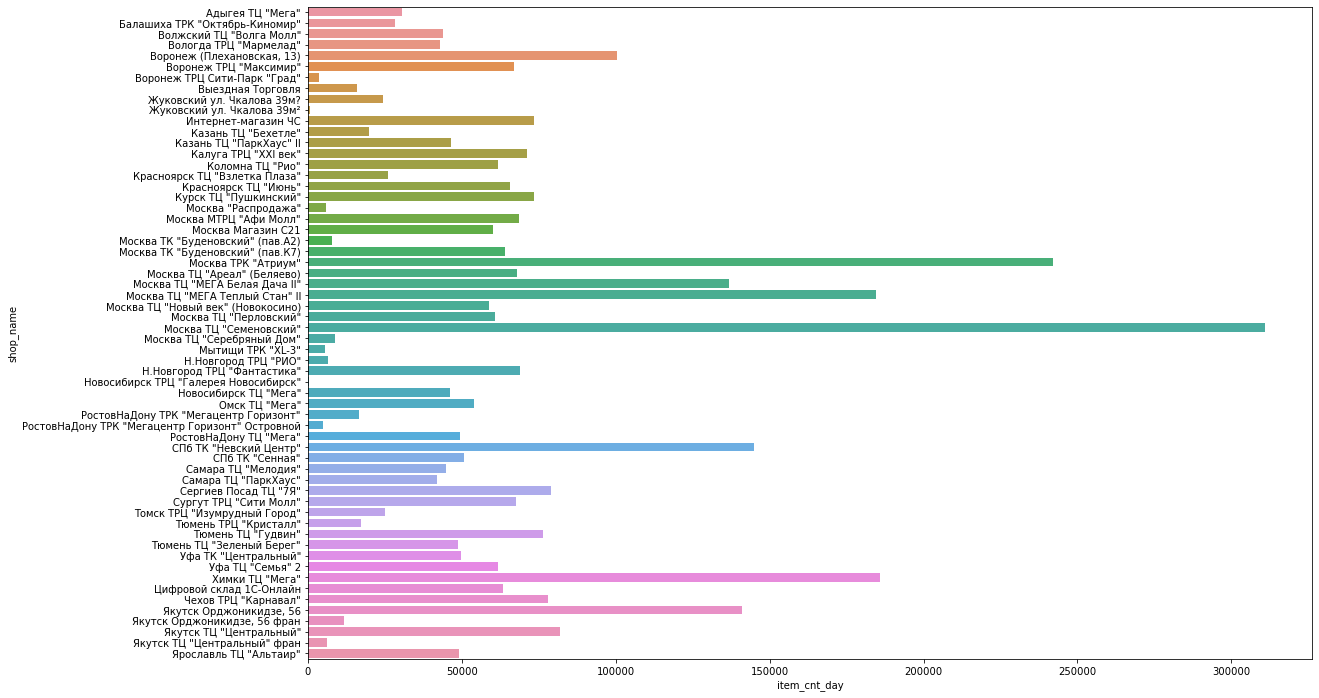

In [56]:
fig = plt.figure(figsize=(18,12))
chart = sns.barplot(x = shops_total, y = shops_total.index)
plt.show()

ADD CONCLUSION

We already saw the distribution of item_cnt_day.
Let's look at the distribution of sold items in a month

In [57]:
fet = pd.DataFrame(sales.groupby([sales.date_block_num, 'item_id'])['item_cnt_day'].sum())
fet.index.names = ['month', 'item_id']
fet.columns = ['item_cnt_month']
fet = fet.reset_index(level = [0,1])

In [58]:
fet.sample(3)

,month,item_id,item_cnt_month
233834,33,21885,1
77529,9,10933,4
217431,30,18277,5


In [59]:
fet[['item_cnt_month']].describe([.25, .5, .75, .95])

,item_cnt_month
count,233912.000000
mean,15.596489
std,96.125890
min,-22.000000
25%,2.000000
50%,4.000000
75%,11.000000
95%,54.000000
max,12557.000000


We see that 95% of the items are sold in less than 54 and the mode is 1

Let's look at the distribution

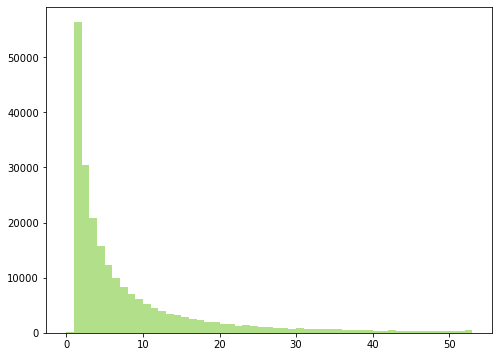

In [60]:
plt.figure(figsize=(8,6))
colors = sns.color_palette('Paired')[2]
plt.hist(fet.item_cnt_month, color = colors, bins = list(range(0,54, 1)))
plt.show()

## Which month is the most selling

In [61]:
m = [3,3,3,3,3,3,3,3,3,3,2,2]

In [62]:
mean_month = pd.DataFrame(sales.groupby(sales.date.dt.month)['item_cnt_day'].sum()/ m).reset_index(level = [0])

In [63]:
mean_month.columns = ['month', 'item_cnt_month']

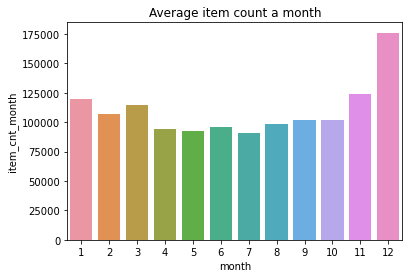

In [64]:
sns.barplot(x='month', y='item_cnt_month', data=mean_month)
plt.title('Average item count a month')
plt.show()

December is clearly the 'leader'

# Merge all

In [65]:
data = pd.merge(sales, shops, on = 'shop_id')
data = pd.merge(data, items, on = 'item_id')
data = pd.merge(data, categories, on = 'item_category_id' )

In [73]:
id_cols = ['shop_id', 'item_id', 'item_category_id']
num_cols = ['date_block_num', 'item_price', 'item_cnt_day']

In [66]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,city,item_name,item_category_id,item_category_name,cat
0,2013-01-02,0,59,22154,999.0,1,"Ярославль ТЦ ""Альтаир""",Ярославль,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино
1,2013-01-02,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",Москва,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино
2,2013-01-03,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",Москва,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино
3,2013-01-20,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",Москва,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино
4,2013-01-23,0,25,22154,999.0,1,"Москва ТРК ""Атриум""",Москва,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино


In [75]:
cat_total = data.groupby('cat')['item_cnt_day'].sum()

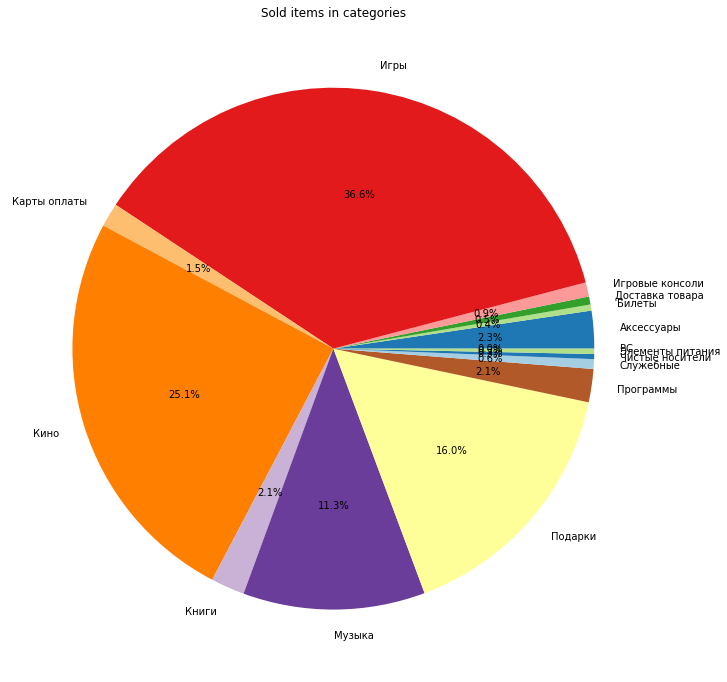

In [76]:
plt.figure(figsize=(12,12))
colors = sns.color_palette('Paired')[:len(cat_total)]
plt.pie(cat_total, labels = cat_total.index, autopct = '%0.1f%%', colors = colors)
plt.title('Sold items in categories')
plt.show()

In [77]:
data.groupby('cat')['item_price'].describe()

,count,mean,std,min,25%,50%,75%,max
cat,,,,,,,,
PC,3.0,87.800000,62.961258,22.400000,57.700000,93.0,120.5,148.0000
Аксессуары,76238.0,1962.820357,1369.316367,22.000000,769.300000,1790.0,2690.0,12490.0000
Билеты,1877.0,1345.441896,694.784320,600.000000,900.000000,1100.0,1300.0,3507.8125
Доставка товара,2193.0,814.342848,1657.406305,0.908714,281.250000,500.0,900.0,59200.0000
Игровые консоли,24770.0,15475.282457,6644.616998,8.000000,10490.000000,13990.0,20990.0,42990.0000
Игры,1029694.0,1120.791267,968.719500,-1.000000,443.940000,799.0,1499.0,12999.0000
Карты оплаты,37905.0,1376.808853,750.512519,250.000000,799.000000,1049.0,1999.0,3399.0000
Кино,833416.0,358.641213,365.011739,0.200000,149.000000,299.0,399.0,7999.0000
Книги,69424.0,388.304958,320.873274,17.000000,249.000000,299.0,390.0,3490.0000


# ADD CATEGORY VS MEAN AND MAX PRICE

In [78]:
item_cnt = pd.DataFrame(data.groupby('item_id')['item_cnt_day'].sum()).reset_index(level = [0])
item_cnt.describe([.25, .5, .75, .95]).drop('item_id', axis = 1)

,item_cnt_day
count,21807.00000
mean,167.29518
std,1366.22019
min,-11.00000
25%,7.00000
50%,33.00000
75%,124.00000
95%,653.00000
max,187642.00000


In [79]:
item_price_mean = pd.DataFrame(data.groupby('item_id')['item_price'].mean()).reset_index(level = [0])

In [80]:
temp = pd.merge(item_cnt, item_price_mean, on = 'item_id')
temp.columns = ['item_id', 'item_cnt_total', 'item_price']
temp.head()

,item_id,item_cnt_total,item_price
0,0,1,58.0
1,1,6,4490.0
2,2,2,58.0
3,3,2,79.0
4,4,1,58.0


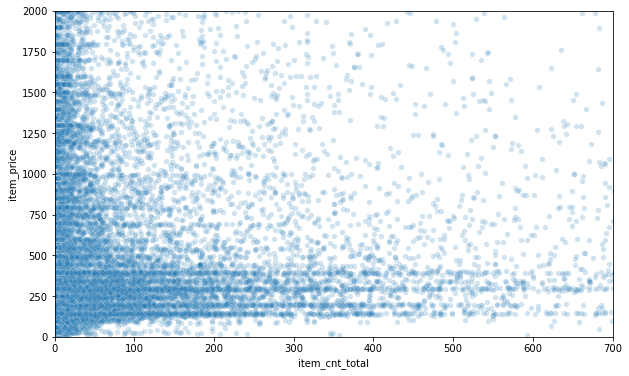

In [81]:
plt.figure(figsize=(10,6))
sc = sns.scatterplot(x = temp.item_cnt_total, y = temp.item_price, x_bins = [0, 50, 100], alpha = 0.2, s = 30)
sc.set_xlim(left=0, right=700)
sc.set_ylim(bottom=0, top=2000);

In [82]:
temp = data.groupby('date_block_num')['item_cnt_day'].sum()

In [83]:
temp.name = 'item_cnt_month'

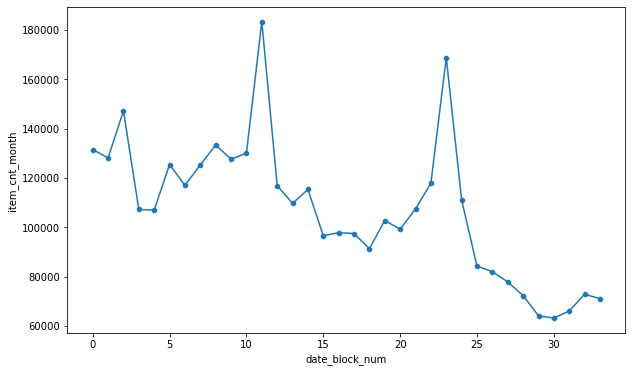

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(y = temp,x = temp.index)
plt.plot(temp.index, temp)
plt.show()

In [115]:
city_cnt_month = pd.DataFrame(data.groupby([data.date_block_num, 'city'])['item_cnt_day'].sum())

In [130]:
city_cnt_month.columns = ['item_cnt_month']

In [131]:
city_cnt_month

item_cnt_month
date_block_num city                     
0              Адыгея             1146.0
               Балашиха            767.0
               Волжский           2114.0
               Воронеж            7644.0
               Жуковский           935.0
...                                  ...
33             Уфа                1908.0
               Цифровой           1972.0
               Чехов              1263.0
               Якутск             3762.0
               Ярославль           790.0

[973 rows x 1 columns]

In [133]:
city_cnt_month = city_cnt_month.reset_index(level=[0,1])

In [134]:
city_cnt_month

,date_block_num,city,item_cnt_month
0,0,Адыгея,1146.0
1,0,Балашиха,767.0
2,0,Волжский,2114.0
3,0,Воронеж,7644.0
4,0,Жуковский,935.0
...,...,...,...
968,33,Уфа,1908.0
969,33,Цифровой,1972.0
970,33,Чехов,1263.0
971,33,Якутск,3762.0
